# Implementing a Neural Network
In this exercise we will develop a neural network with fully-connected layers to perform classification, and test it out on the CIFAR-10 dataset.

In [1]:
# A bit of setup

import numpy as np
import matplotlib.pyplot as plt

from cs231n.classifiers.neural_net import TwoLayerNet

from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

We will use the class `TwoLayerNet` in the file `cs231n/classifiers/neural_net.py` to represent instances of our network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays. Below, we initialize toy data and a toy model that we will use to develop your implementation.

In [2]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

# Forward pass: compute scores
Open the file `cs231n/classifiers/neural_net.py` and look at the method `TwoLayerNet.loss`. This function is very similar to the loss functions you have written for the SVM and Softmax exercises: It takes the data and weights and computes the class scores, the loss, and the gradients on the parameters. 

Implement the first part of the forward pass which uses the weights and biases to compute the scores for all inputs.

In [3]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.68027209324e-08


# Forward pass: compute loss
In the same function, implement the second part that computes the data and regularizaion loss.

In [4]:
#loss, _ = net.loss(X, y, reg=0.05)
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
0.0189654196061


# Backward pass
Implement the rest of the function. This will compute the gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`. Now that you (hopefully!) have a correctly implemented forward pass, you can debug your backward pass using a numeric gradient check:

In [5]:
from cs231n.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.05)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W1 max relative error: 3.561318e-09
b1 max relative error: 2.738421e-09
b2 max relative error: 4.447646e-11
W2 max relative error: 3.440708e-09


# Train the network
To train the network we will use stochastic gradient descent (SGD), similar to the SVM and Softmax classifiers. Look at the function `TwoLayerNet.train` and fill in the missing sections to implement the training procedure. This should be very similar to the training procedure you used for the SVM and Softmax classifiers. You will also have to implement `TwoLayerNet.predict`, as the training process periodically performs prediction to keep track of accuracy over time while the network trains.

Once you have implemented the method, run the code below to train a two-layer network on toy data. You should achieve a training loss less than 0.2.

iteration 0 / 100: loss 1.241992
iteration 1 / 100: loss 0.911190
iteration 2 / 100: loss 0.727968
iteration 3 / 100: loss 0.587929
iteration 4 / 100: loss 0.443397
iteration 5 / 100: loss 0.321230
iteration 6 / 100: loss 0.229573
iteration 7 / 100: loss 0.191953
iteration 8 / 100: loss 0.142649
iteration 9 / 100: loss 0.122726
iteration 10 / 100: loss 0.092961
iteration 11 / 100: loss 0.077940
iteration 12 / 100: loss 0.072621
iteration 13 / 100: loss 0.065356
iteration 14 / 100: loss 0.054615
iteration 15 / 100: loss 0.045518
iteration 16 / 100: loss 0.047013
iteration 17 / 100: loss 0.042978
iteration 18 / 100: loss 0.036998
iteration 19 / 100: loss 0.036122
iteration 20 / 100: loss 0.036050
iteration 21 / 100: loss 0.032938
iteration 22 / 100: loss 0.030055
iteration 23 / 100: loss 0.031590
iteration 24 / 100: loss 0.028283
iteration 25 / 100: loss 0.029210
iteration 26 / 100: loss 0.024270
iteration 27 / 100: loss 0.026356
iteration 28 / 100: loss 0.025843
iteration 29 / 100: loss

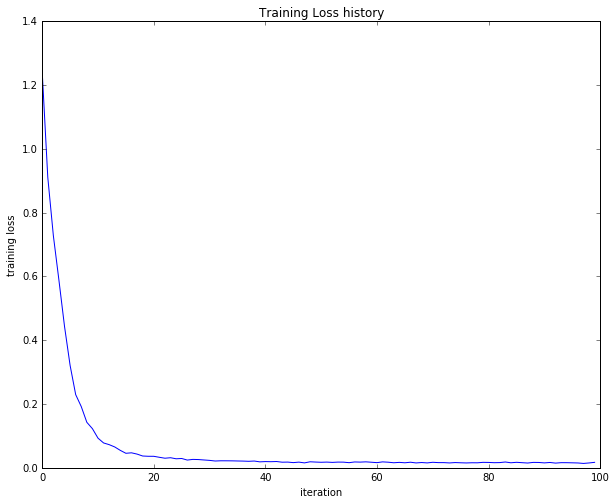

In [6]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=True)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Load the data
Now that you have implemented a two-layer network that passes gradient checks and works on toy data, it's time to load up our favorite CIFAR-10 data so we can use it to train a classifier on a real dataset.

In [7]:
from cs231n.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


# Train a network
To train our network we will use SGD with momentum. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

In [8]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)
#reg=0.25 old
# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.5, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)



iteration 0 / 1000: loss 2.302954
iteration 1 / 1000: loss 2.302974
iteration 2 / 1000: loss 2.302955
iteration 3 / 1000: loss 2.302974
iteration 4 / 1000: loss 2.302966
iteration 5 / 1000: loss 2.302963
iteration 6 / 1000: loss 2.302955
iteration 7 / 1000: loss 2.302961
iteration 8 / 1000: loss 2.302956
iteration 9 / 1000: loss 2.302953
iteration 10 / 1000: loss 2.302967
iteration 11 / 1000: loss 2.302961
iteration 12 / 1000: loss 2.302954
iteration 13 / 1000: loss 2.302962
iteration 14 / 1000: loss 2.302951
iteration 15 / 1000: loss 2.302944
iteration 16 / 1000: loss 2.302974
iteration 17 / 1000: loss 2.302951
iteration 18 / 1000: loss 2.302946
iteration 19 / 1000: loss 2.302960
iteration 20 / 1000: loss 2.302937
iteration 21 / 1000: loss 2.302942
iteration 22 / 1000: loss 2.302916
iteration 23 / 1000: loss 2.302934
iteration 24 / 1000: loss 2.302931
iteration 25 / 1000: loss 2.302921
iteration 26 / 1000: loss 2.302935
iteration 27 / 1000: loss 2.302916
iteration 28 / 1000: loss 2.30

iteration 236 / 1000: loss 2.292884
iteration 237 / 1000: loss 2.289676
iteration 238 / 1000: loss 2.295894
iteration 239 / 1000: loss 2.290102
iteration 240 / 1000: loss 2.292399
iteration 241 / 1000: loss 2.291283
iteration 242 / 1000: loss 2.289374
iteration 243 / 1000: loss 2.289920
iteration 244 / 1000: loss 2.291566
iteration 245 / 1000: loss 2.293751
iteration 246 / 1000: loss 2.288952
iteration 247 / 1000: loss 2.295304
iteration 248 / 1000: loss 2.292725
iteration 249 / 1000: loss 2.291722
iteration 250 / 1000: loss 2.287561
iteration 251 / 1000: loss 2.290235
iteration 252 / 1000: loss 2.291812
iteration 253 / 1000: loss 2.286427
iteration 254 / 1000: loss 2.287228
iteration 255 / 1000: loss 2.286810
iteration 256 / 1000: loss 2.286010
iteration 257 / 1000: loss 2.287260
iteration 258 / 1000: loss 2.286397
iteration 259 / 1000: loss 2.286188
iteration 260 / 1000: loss 2.283877
iteration 261 / 1000: loss 2.280945
iteration 262 / 1000: loss 2.284408
iteration 263 / 1000: loss 2

iteration 473 / 1000: loss 2.179597
iteration 474 / 1000: loss 2.187084
iteration 475 / 1000: loss 2.128182
iteration 476 / 1000: loss 2.167987
iteration 477 / 1000: loss 2.180197
iteration 478 / 1000: loss 2.131755
iteration 479 / 1000: loss 2.136764
iteration 480 / 1000: loss 2.122204
iteration 481 / 1000: loss 2.165589
iteration 482 / 1000: loss 2.144632
iteration 483 / 1000: loss 2.164781
iteration 484 / 1000: loss 2.150455
iteration 485 / 1000: loss 2.130729
iteration 486 / 1000: loss 2.157846
iteration 487 / 1000: loss 2.110056
iteration 488 / 1000: loss 2.167655
iteration 489 / 1000: loss 2.126878
iteration 490 / 1000: loss 2.091515
iteration 491 / 1000: loss 2.168479
iteration 492 / 1000: loss 2.152434
iteration 493 / 1000: loss 2.116310
iteration 494 / 1000: loss 2.108372
iteration 495 / 1000: loss 2.096632
iteration 496 / 1000: loss 2.147581
iteration 497 / 1000: loss 2.156572
iteration 498 / 1000: loss 2.100967
iteration 499 / 1000: loss 2.127443
iteration 500 / 1000: loss 2

iteration 709 / 1000: loss 2.076281
iteration 710 / 1000: loss 2.034841
iteration 711 / 1000: loss 2.052296
iteration 712 / 1000: loss 1.938621
iteration 713 / 1000: loss 2.044762
iteration 714 / 1000: loss 2.076728
iteration 715 / 1000: loss 2.089649
iteration 716 / 1000: loss 1.970799
iteration 717 / 1000: loss 1.999094
iteration 718 / 1000: loss 2.096697
iteration 719 / 1000: loss 2.024787
iteration 720 / 1000: loss 2.077065
iteration 721 / 1000: loss 2.066227
iteration 722 / 1000: loss 2.071339
iteration 723 / 1000: loss 2.054127
iteration 724 / 1000: loss 2.031746
iteration 725 / 1000: loss 2.035345
iteration 726 / 1000: loss 2.065899
iteration 727 / 1000: loss 2.008149
iteration 728 / 1000: loss 1.966880
iteration 729 / 1000: loss 2.044993
iteration 730 / 1000: loss 1.993969
iteration 731 / 1000: loss 2.046195
iteration 732 / 1000: loss 2.044779
iteration 733 / 1000: loss 2.080267
iteration 734 / 1000: loss 2.003359
iteration 735 / 1000: loss 2.072302
iteration 736 / 1000: loss 2

iteration 938 / 1000: loss 1.936206
iteration 939 / 1000: loss 2.005679
iteration 940 / 1000: loss 1.962487
iteration 941 / 1000: loss 1.955092
iteration 942 / 1000: loss 1.972541
iteration 943 / 1000: loss 2.022360
iteration 944 / 1000: loss 1.960001
iteration 945 / 1000: loss 2.004331
iteration 946 / 1000: loss 2.051323
iteration 947 / 1000: loss 1.912279
iteration 948 / 1000: loss 2.011276
iteration 949 / 1000: loss 1.916834
iteration 950 / 1000: loss 2.033288
iteration 951 / 1000: loss 1.975653
iteration 952 / 1000: loss 1.964298
iteration 953 / 1000: loss 1.985258
iteration 954 / 1000: loss 1.896732
iteration 955 / 1000: loss 1.934874
iteration 956 / 1000: loss 1.921261
iteration 957 / 1000: loss 1.949969
iteration 958 / 1000: loss 1.927558
iteration 959 / 1000: loss 1.956617
iteration 960 / 1000: loss 1.984727
iteration 961 / 1000: loss 1.921239
iteration 962 / 1000: loss 2.007879
iteration 963 / 1000: loss 2.014463
iteration 964 / 1000: loss 2.033157
iteration 965 / 1000: loss 2

# Debug the training
With the default parameters we provided above, you should get a validation accuracy of about 0.29 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

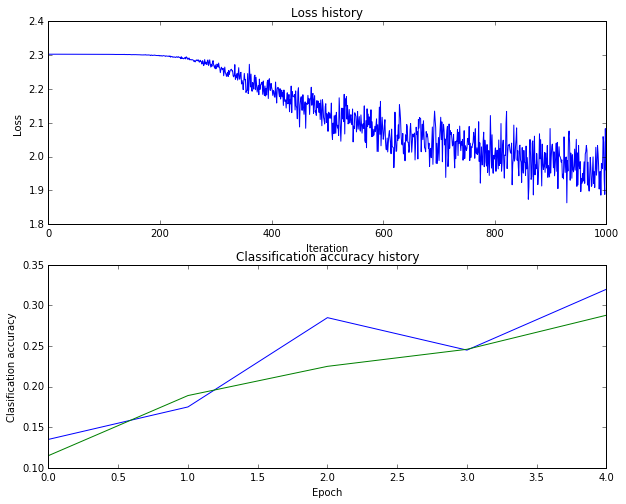

In [9]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.show()

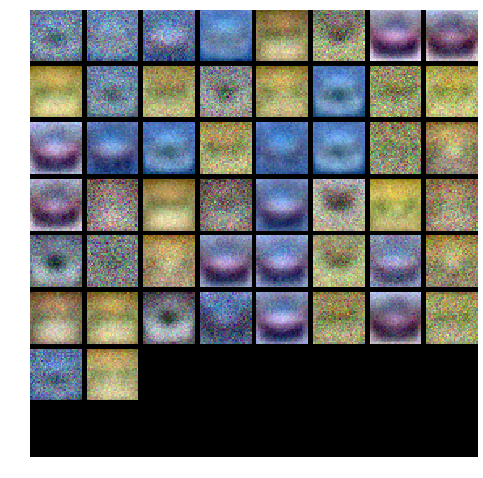

In [10]:
from cs231n.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

# Tune your hyperparameters

**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength. You might also consider tuning the learning rate decay, but you should be able to get good performance using the default value.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than 48% on the validation set. Our best network gets over 52% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on CIFAR-10 as you can, with a fully-connected Neural Network. For every 1% above 52% on the Test set we will award you with one extra bonus point. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).

In [14]:
best_net = None # store the best model into this 
best_val = -1
best_stats = None
learning_rates = [1e-2, 1e-3]
regularization_strengths = [0.4, 0.5, 0.6]
results = {} 
#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################
iters = 1500
for lr in learning_rates:
    for rs in regularization_strengths:
        net = TwoLayerNet(input_size, hidden_size, num_classes)
        # Train the network
        stats = net.train(X_train, y_train, X_val, y_val,
                    num_iters=iters, batch_size=200,
                    learning_rate=lr, learning_rate_decay=0.95,
                    reg=rs)
        y_train_pred = net.predict(X_train)
        acc_train = np.mean(y_train == y_train_pred)
        y_val_pred = net.predict(X_val)
        acc_val = np.mean(y_val == y_val_pred)
        
        results[(lr, rs)] = (acc_train, acc_val)
        
        if best_val < acc_val:
            best_stats = stats
            best_val = acc_val
            best_net = net
# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print ('lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy))
    
print ('best validation accuracy achieved during cross-validation: %f' % best_val)
#################################################################################
#                               END OF YOUR CODE                                #
#################################################################################

/home/daryl/Downloads/assignment1/cs231n/classifiers/neural_net.py:128: RuntimeWarning: divide by zero encountered in log
  corect_logprobs = np.log(probs[np.arange(N),y])
/home/daryl/Downloads/assignment1/cs231n/classifiers/neural_net.py:118: RuntimeWarning: overflow encountered in subtract
  scores_norm = scores - np.max(scores, axis = 1).reshape(-1,1)
/home/daryl/Downloads/assignment1/cs231n/classifiers/neural_net.py:118: RuntimeWarning: invalid value encountered in subtract
  scores_norm = scores - np.max(scores, axis = 1).reshape(-1,1)
/home/daryl/Downloads/assignment1/cs231n/classifiers/neural_net.py:155: RuntimeWarning: invalid value encountered in less_equal
  dhidden[a1 <= 0] = 0


lr 1.000000e-03 reg 4.000000e-01 train accuracy: 0.512020 val accuracy: 0.488000
lr 1.000000e-03 reg 5.000000e-01 train accuracy: 0.502571 val accuracy: 0.481000
lr 1.000000e-03 reg 6.000000e-01 train accuracy: 0.504776 val accuracy: 0.471000
lr 1.000000e-02 reg 4.000000e-01 train accuracy: 0.100265 val accuracy: 0.087000
lr 1.000000e-02 reg 5.000000e-01 train accuracy: 0.100265 val accuracy: 0.087000
lr 1.000000e-02 reg 6.000000e-01 train accuracy: 0.100265 val accuracy: 0.087000
best validation accuracy achieved during cross-validation: 0.488000


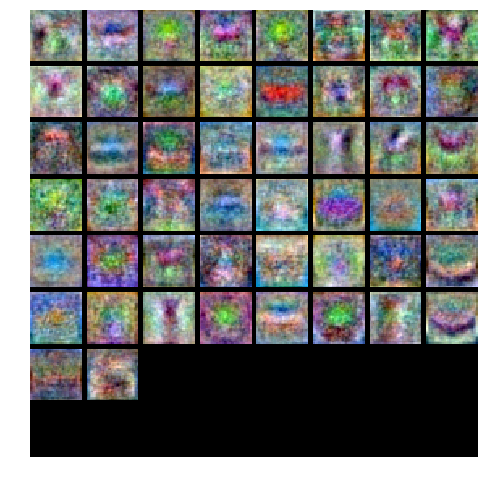

In [15]:
# visualize the weights of the best network
show_net_weights(best_net)

# Run on the test set
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 48%.

**We will give you extra bonus point for every 1% of accuracy above 52%.**

In [16]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.485
